# Exploratory Data Analysis of the National Collision Database 2017

In [1]:
import pandas as pd
import numpy as np
import altair as alt

from sklearn.model_selection import train_test_split

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype');

In [2]:
# pip install altair_data_server

## Read in the data set

The data set used in this project is National Collision Database (NCDB) 2017 – a database containing all police-reported motor vehicle collisions on public roads in Canada in 2017. 
<ul>
  <li><a href="https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a/resource/01426d41-529c-443f-a901-6bc2f94f3d73">
      Data file can be found here.</a></li>
  <li><a href="https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a/resource/09b74afc-2745-4382-8a02-3e256c4b28fd">
      Data dictionary can be found here.</a></li>

In [3]:
# Importing NCDB
ncdb = pd.read_csv('data/NCDB_2017.csv', low_memory=False)

# Creating 'FATALITY' column to convert multi-class outcomes to binary-class
ncdb.loc[ncdb['P_ISEV'] == '3', 'FATALITY'] = "True"
ncdb.loc[ncdb['P_ISEV'] != '3', 'FATALITY'] = "False"

## Summarize the entire data set

Each row in the data set represents different aspects of a collision, including the severity of the collision (no injury or injury or fatality) and other details (collision time, weather condition, road type, vehicle type, etc.).

In [4]:
ncdb.sort_index()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,FATALITY
0,2017,01,1,10,2,01,02,03,1,3,...,UUUU,01,M,75,11,2,NN,1,2455950,False
1,2017,01,1,12,2,01,04,UU,1,5,...,UUUU,01,F,21,11,2,02,1,2455959,False
2,2017,01,1,00,2,01,03,UU,7,3,...,UUUU,01,F,34,11,2,02,1,2455998,False
3,2017,01,1,17,2,02,21,UU,1,1,...,UUUU,01,F,50,11,2,02,1,2456104,False
4,2017,01,1,17,2,02,21,UU,1,1,...,UUUU,01,M,63,11,1,NN,1,2456104,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289836,2017,UU,U,UU,2,UU,UU,01,U,U,...,UUUU,01,F,20,11,1,NN,1,2455828,False
289837,2017,UU,U,UU,2,UU,UU,01,U,U,...,UUUU,01,F,47,11,1,NN,1,2455828,False
289838,2017,UU,U,UU,2,UU,UU,01,U,U,...,UUUU,01,M,24,11,1,NN,1,2455828,False
289839,2017,UU,U,23,2,01,03,01,1,1,...,UUUU,01,M,45,96,2,09,U,2570233,False


In [5]:
ncdb.shape

(289841, 24)

## Partition the data set into training and test sets

We will split the data such that the training set takes 90% of observations and the test set takes 10% of observations.

In [6]:
nc_train, nc_test = train_test_split(ncdb, test_size=0.1, random_state=21)

We will "lock" the test set and only look at the training set from now on. The train data set has 260856 observations and 24 features. The number of observations for the no-fatality vs. fatality classes is shown as follows.

In [7]:
train_count = pd.DataFrame(nc_train['FATALITY'].value_counts())
train_count.rename(index={'False':'No fatality', 'True':'Fatality'}, columns={'FATALITY':'Train Count'}, inplace=True)
train_count

,Train Count
No fatality,259176
Fatality,1680


From the data summary, we see a lot of missing values represented with characters such as "N", "X", etc. We will replace them with np.nan before we carry out EDA so that .describe() or .info() can pick those values as missing values, and to avoid errors later on when we try to pass the data to a classifier. 

In [8]:
null_value = ['N', 'NN', 'NNNN', 'Q', 'QQ', 'U', 'UU', 'UUUU', 'X', 'XX', 'XXXX']
nc_train_nan = nc_train.replace(to_replace=null_value, value=np.nan)
nc_test_nan = nc_test.replace(to_replace=null_value, value=np.nan)
nc_train_nan.shape

(260856, 24)

In [9]:
nc_train_nan.sort_index()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,FATALITY
0,2017,01,1,10,2,01,02,03,1,3,...,NaN,01,M,75,11,2,NaN,1,2455950,False
1,2017,01,1,12,2,01,04,NaN,1,5,...,NaN,01,F,21,11,2,02,1,2455959,False
2,2017,01,1,00,2,01,03,NaN,7,3,...,NaN,01,F,34,11,2,02,1,2455998,False
3,2017,01,1,17,2,02,21,NaN,1,1,...,NaN,01,F,50,11,2,02,1,2456104,False
4,2017,01,1,17,2,02,21,NaN,1,1,...,NaN,01,M,63,11,1,NaN,1,2456104,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289835,2017,NaN,NaN,NaN,2,NaN,NaN,01,NaN,NaN,...,NaN,01,F,79,11,1,NaN,1,2455828,False
289836,2017,NaN,NaN,NaN,2,NaN,NaN,01,NaN,NaN,...,NaN,01,F,20,11,1,NaN,1,2455828,False
289838,2017,NaN,NaN,NaN,2,NaN,NaN,01,NaN,NaN,...,NaN,01,M,24,11,1,NaN,1,2455828,False
289839,2017,NaN,NaN,23,2,01,03,01,1,1,...,NaN,01,M,45,96,2,09,NaN,2570233,False


We gather the summary statistics of the train data set as follows.

In [10]:
nc_train_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260856 entries, 102310 to 80841
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   C_YEAR    260856 non-null  int64 
 1   C_MNTH    260839 non-null  object
 2   C_WDAY    260839 non-null  object
 3   C_HOUR    258903 non-null  object
 4   C_SEV     260856 non-null  int64 
 5   C_VEHS    260836 non-null  object
 6   C_CONF    238175 non-null  object
 7   C_RCFG    238909 non-null  object
 8   C_WTHR    257420 non-null  object
 9   C_RSUR    250869 non-null  object
 10  C_RALN    248306 non-null  object
 11  C_TRAF    245338 non-null  object
 12  V_ID      260845 non-null  object
 13  V_TYPE    246911 non-null  object
 14  V_YEAR    234799 non-null  object
 15  P_ID      260709 non-null  object
 16  P_SEX     247756 non-null  object
 17  P_AGE     245231 non-null  object
 18  P_PSN     254207 non-null  object
 19  P_ISEV    245556 non-null  object
 20  P_SAFE    203476 non-n

In [11]:
nc_train_nan.describe()

,C_YEAR,C_SEV,C_CASE
count,260856.0,260856.000000,2.608560e+05
mean,2017.0,1.984769,2.512672e+06
std,0.0,0.122469,3.294483e+04
min,2017.0,1.000000,2.455828e+06
25%,2017.0,2.000000,2.484665e+06
50%,2017.0,2.000000,2.512022e+06
75%,2017.0,2.000000,2.541492e+06
max,2017.0,2.000000,2.570235e+06


## Perform exploratory data analysis on the training set

In search of features that might be beneficial in predicting the fatality class, we selected top five predictors (based on intuition), plotted the distributions of each predictor from the training data set, and faceted the distribution by class (no-fatality: blue, fatality: orange).

Predictors are plotted in the following order: 
1. Weather condition
2. Road configuration
3. Month 
4. Vehicle type
5. Driver age

In [12]:
def create_chart(col, title):
    """
    Returns distribution plots of the feature of interest from the dataframe `nc_train_nan`.
    The plot is faceted by class (no-fatality: blue, fatality: orange).

    Parameters
    ----------
    col : str
        the feature of interest
    title : str
        the label for the feature in the returned plot

    Returns
    -------
    out: altair.vegalite.v4.api.FacetChart 
       the faceted distribution plots 
    
    Examples
    --------
    >>> create_chart('C_WTHR', 'Weather condition')
    """
    
    if col == 'P_AGE':
        chart = alt.Chart(nc_train_nan).mark_line().encode(
                    x=alt.X('P_AGE:Q', title=title),
                    y=alt.Y('count()', title='Number of collisions'),
                    color=alt.Color('FATALITY', legend=None)
                ).properties(
                    width=300,
                    height=300
                ).facet('FATALITY'
                ).resolve_scale(y='independent'
        )
    
    else:
        chart = alt.Chart(nc_train_nan).mark_bar(opacity=0.8).encode(
                    x=alt.X(col, title=title),
                    y=alt.Y('count()', title='Number of collisions'),
                    color=alt.Color('FATALITY', legend=None)
                ).properties(
                    width=300,
                    height=300
                ).facet('FATALITY'
                ).resolve_scale(y='independent'
        )
        
    return chart

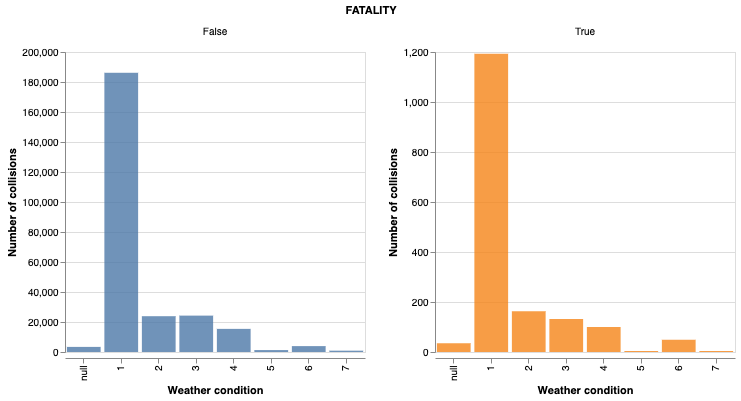

In [13]:
create_chart('C_WTHR', 'Weather condition')

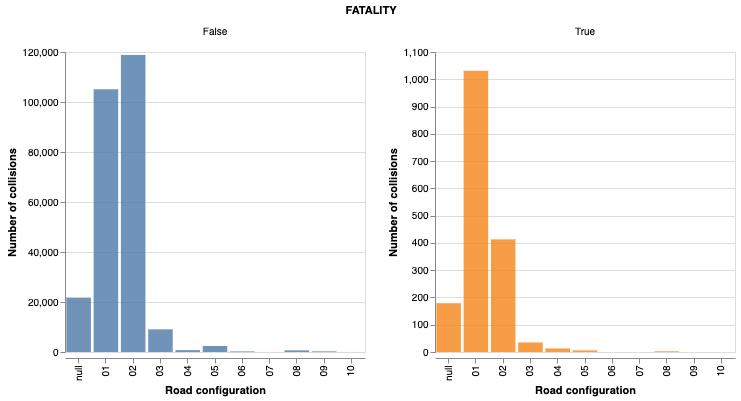

In [14]:
create_chart('C_RCFG', 'Road configuration')

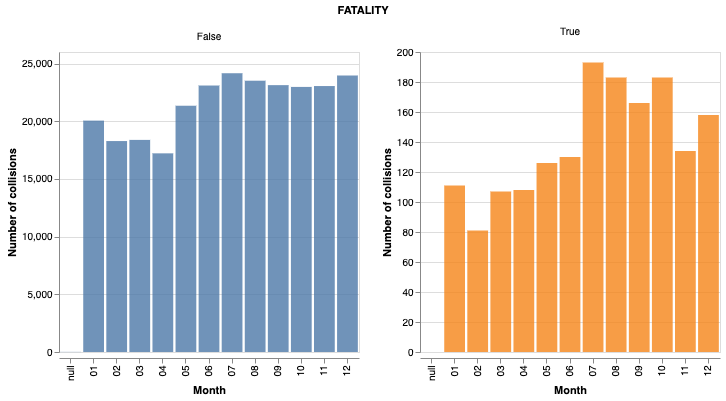

In [15]:
create_chart('C_MNTH', 'Month')

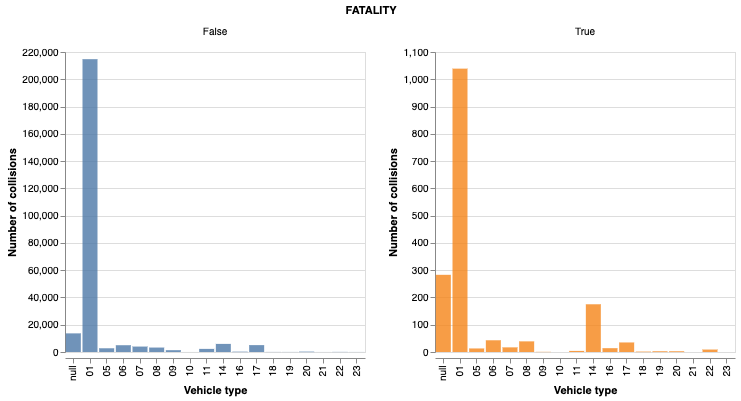

In [16]:
create_chart('V_TYPE', 'Vehicle type')

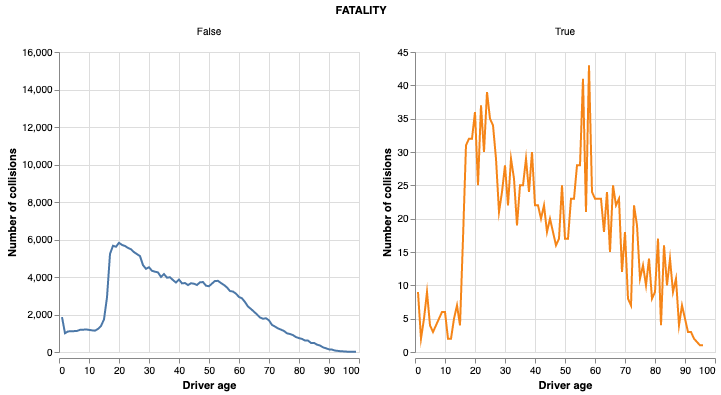

In [17]:
create_chart('P_AGE', 'Driver age')

## Create a profile report using `pandas-profiling` (optional)

Uncomment the following code to produce the profile report. We made it optional because the code takes quite a while to run and does not render well on GitHub.

In [18]:
# pip install pandas-profiling
# pip install ipywidgets

#from pandas_profiling import ProfileReport

#profile = ProfileReport(nc_train_nan, title='National Collision Database 2017')

#profile.to_notebook_iframe()